## 2024 KC CRISPR screen 

### Visualisation script primarily using scCustomize

### Differential expression analysis using sgRNA-containing vs. non-targeting cells

run under r4-crispr

In [1]:
#load packages
suppressMessages({
    library(dplyr)
    library(data.table)
    library(ggplot2)
    library(ggrepel)
    library(grid)
    library(RColorBrewer)
    library(Seurat)
    library(scales)
    library(reshape2)
    library(stringr)
    library(magrittr)
    library(cowplot)
    library(scCustomize)

    #additional visualization purposes
    library(hrbrthemes)
    library(GGally)
    library(viridis)
    library(UpSetR)
    library(pheatmap)
})

In [2]:
#Caution, data alignment input path changed
datapath<-".../2024June_Karl_CRISPRia/Alignment_AddedReads_2024Sep/"
obj_out_dir<-".../obj/"
output_dir<-".../Output/"

pdim<-function(x,y){
    return(options(repr.plot.width=x, repr.plot.height=y))
}

In [3]:
obj.list<-readRDS(paste0(obj_out_dir,
                         "2024July_Karl_CRISPRscreen_Singlet_objlist_AddedReads_ClusterCleaned.rds"))

In [4]:
head(obj.list[[4]]@meta.data)
colnames(obj.list[[1]]@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,nCount_GDO,nFeature_GDO,percent.mt,guide_state,guide_name,guide_counts,CellID,⋯,old.ident,CC.Difference,RNA_snn_res.0.5,seurat_clusters,gene,NT,crispr,mixscape_class,mixscape_class_p_perturb,mixscape_class.global
,<fct>,<dbl>,<int>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<fct>,<dbl>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
AAACCCAAGCTACTGT-1,SeuratProject,3411,1917,4,3,0.2638522,Negative,None,0,AAACCCAAGCTACTGT-1,⋯,SeuratProject,-0.030786736,1,1,H2-T3,H2-T3-3,Targeted,H2-T3 NP,0,NP
AAACCCACAGGCGTTC-1,SeuratProject,5249,2596,4,2,0.9335111,Singlet,PUS10-3,3,AAACCCACAGGCGTTC-1,⋯,SeuratProject,0.017755919,3,3,PUS10,PUS10-3,Targeted,PUS10 NP,0,NP
AAACCCAGTCTAACGT-1,SeuratProject,8697,3776,8,2,1.1958146,Singlet,ZFP217-1,7,AAACCCAGTCTAACGT-1,⋯,SeuratProject,-0.001089781,1,1,ZFP217,ZFP217-1,Targeted,ZFP217 NP,0,NP
AAACCCAGTTGGGTAG-1,SeuratProject,3342,1762,1,1,6.3135847,Negative,None,0,AAACCCAGTTGGGTAG-1,⋯,SeuratProject,-0.006520416,6,6,TENT4A,TENT4A-3,Targeted,TENT4A NP,0,NP
AAACCCATCACCTACC-1,SeuratProject,3462,1870,3,2,2.1086077,Negative,None,0,AAACCCATCACCTACC-1,⋯,SeuratProject,0.011994594,6,6,PLP1,PLP1-3,Targeted,PLP1 NP,0,NP
AAACCCATCCGCATAA-1,SeuratProject,68459,9146,3,2,2.6760543,Negative,None,0,AAACCCATCCGCATAA-1,⋯,SeuratProject,-0.012242291,4,4,MPV17L2,MPV17L2-2,Targeted,MPV17L2 NP,0,NP


[1] "orig.ident"               "nCount_RNA"              
 [3] "nFeature_RNA"             "nCount_GDO"              
 [5] "nFeature_GDO"             "percent.mt"              
 [7] "guide_state"              "guide_name"              
 [9] "guide_counts"             "CellID"                  
[11] "zscore_guide_state"       "zscore_guide_calling"    
[13] "zscore_feature_calling"   "S.Score"                 
[15] "G2M.Score"                "Phase"                   
[17] "old.ident"                "CC.Difference"           
[19] "RNA_snn_res.0.5"          "seurat_clusters"         
[21] "gene"                     "NT"                      
[23] "crispr"                   "mixscape_class"          
[25] "mixscape_class_p_perturb" "mixscape_class.global"

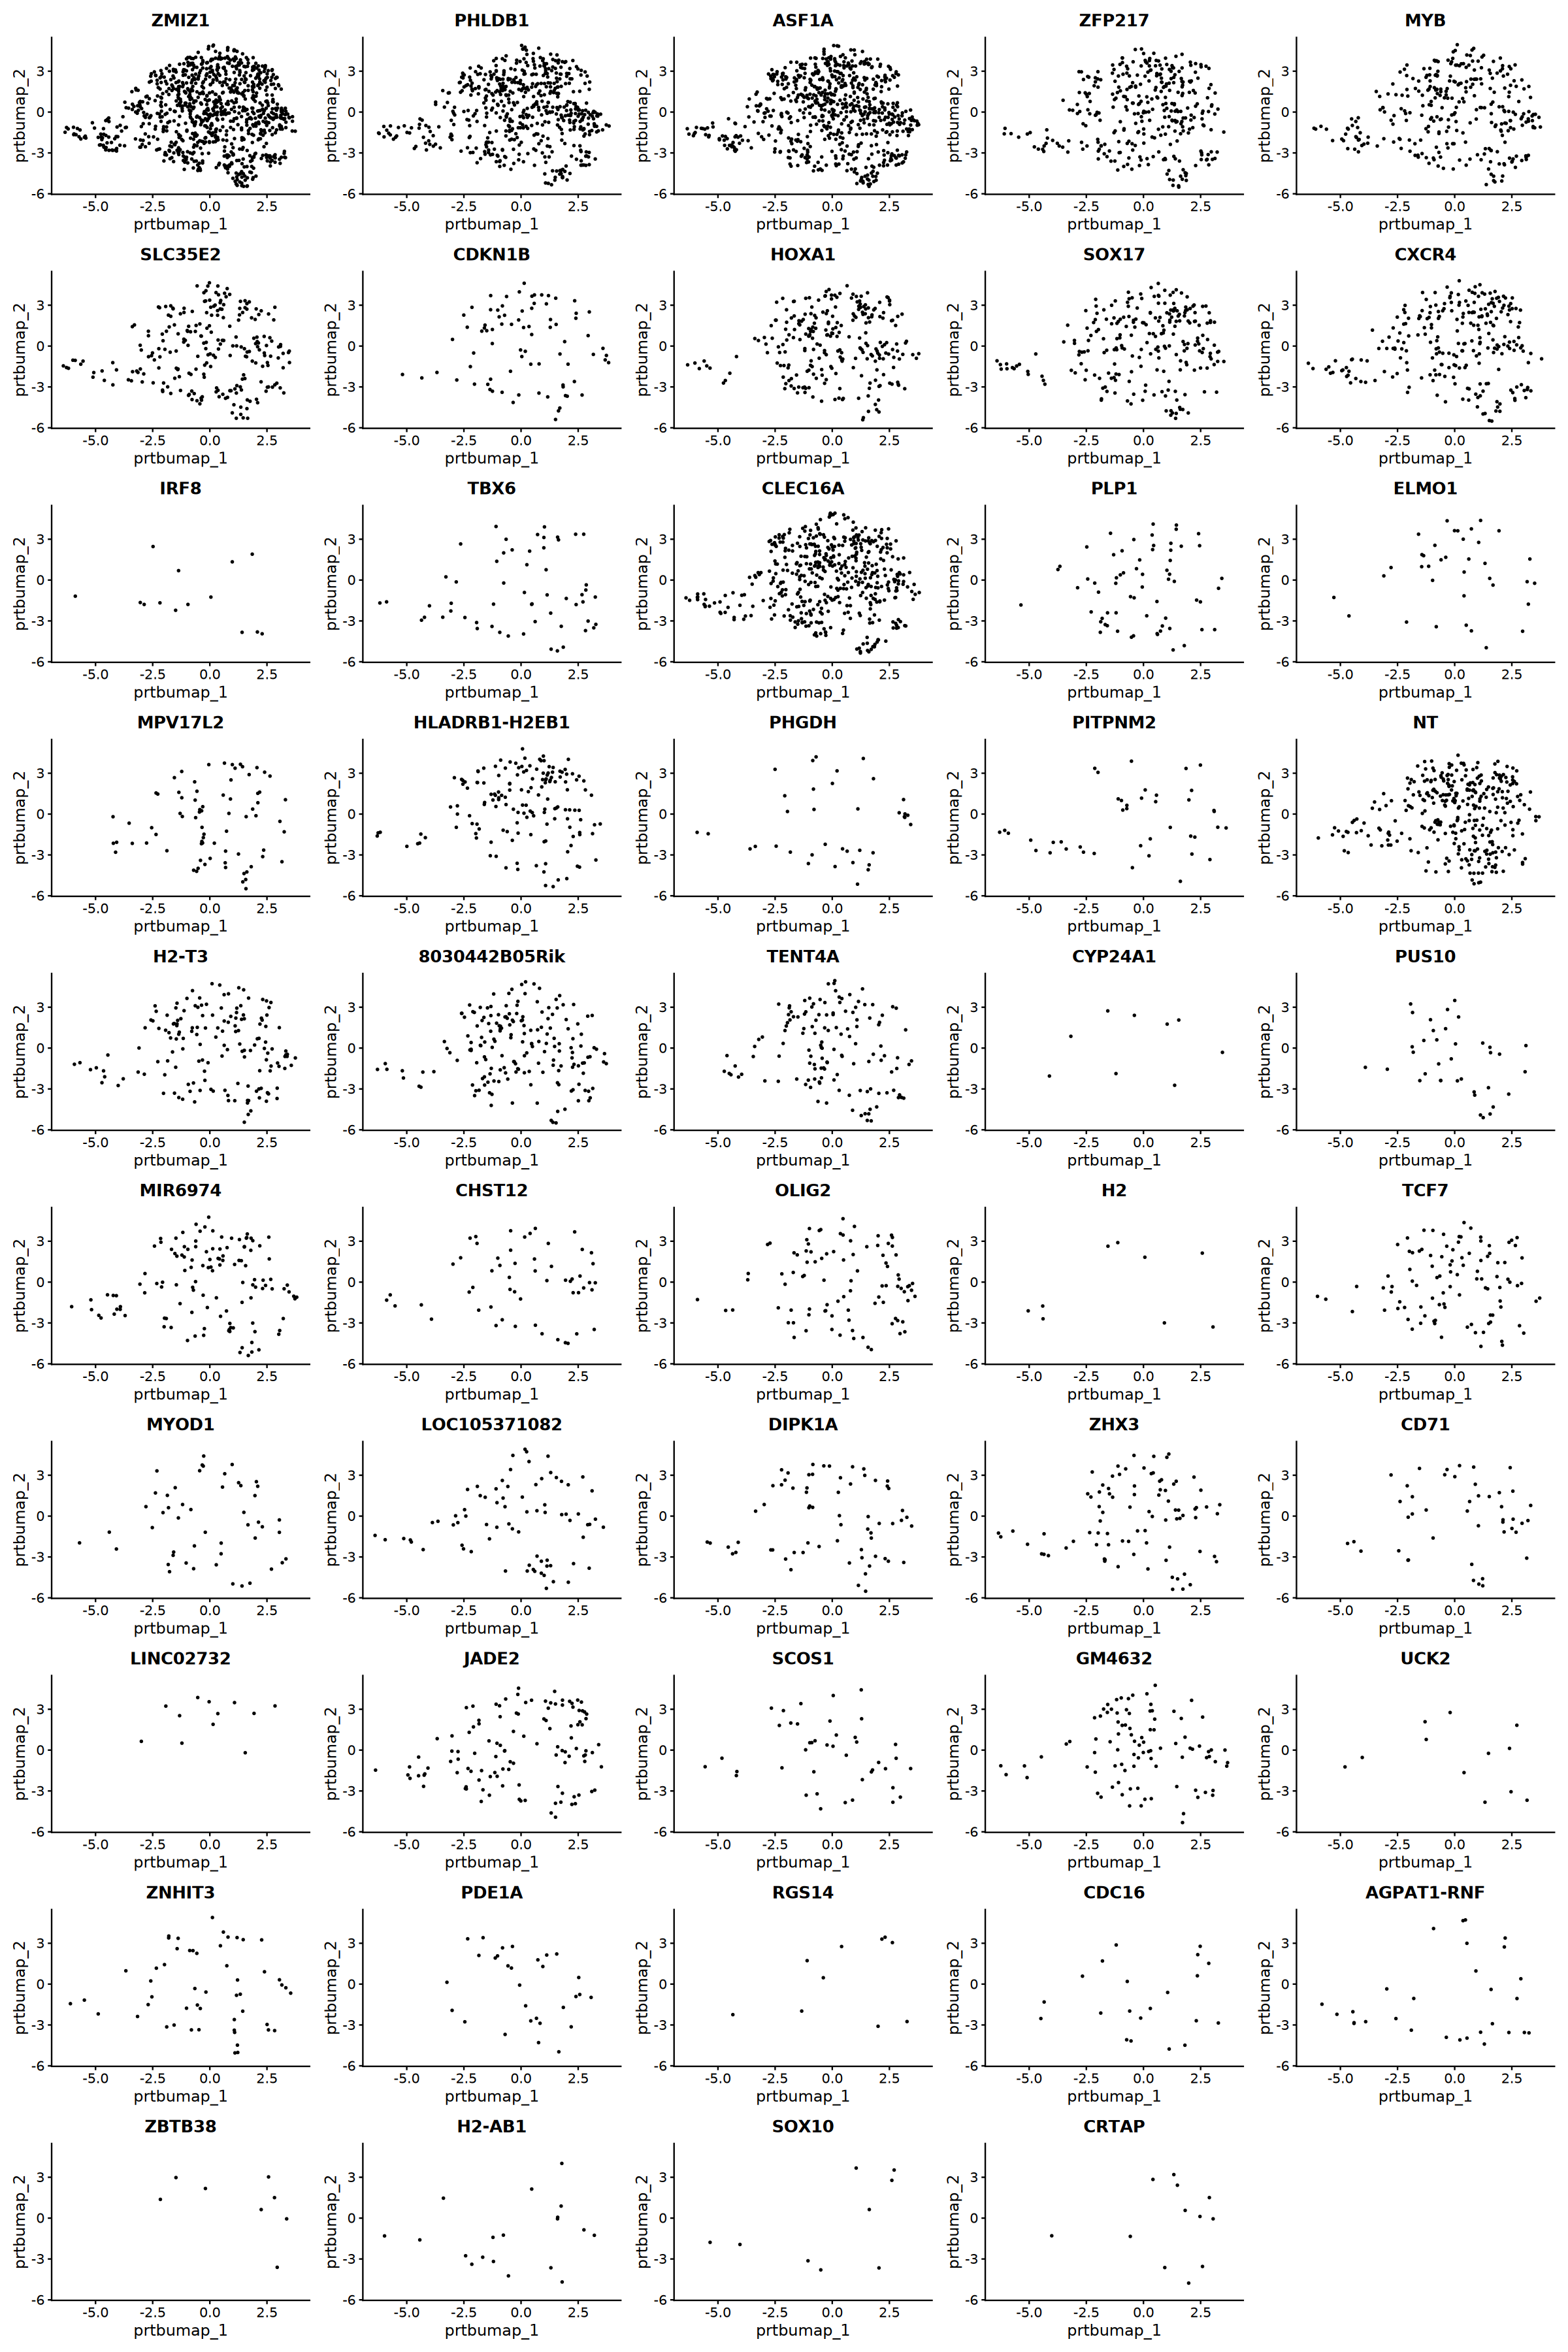

In [5]:
pdim(20,30)
DimPlot_All_Samples(seurat_object = obj.list[[3]], 
                    meta_data_column = "gene", 
                    num_col = 5, pt.size = 0.5)

### Observe DEG using mixscape heatmap

In [8]:
obj<-obj.list[[3]]

Centering and scaling data matrix

Centering and scaling data matrix

Centering and scaling data matrix



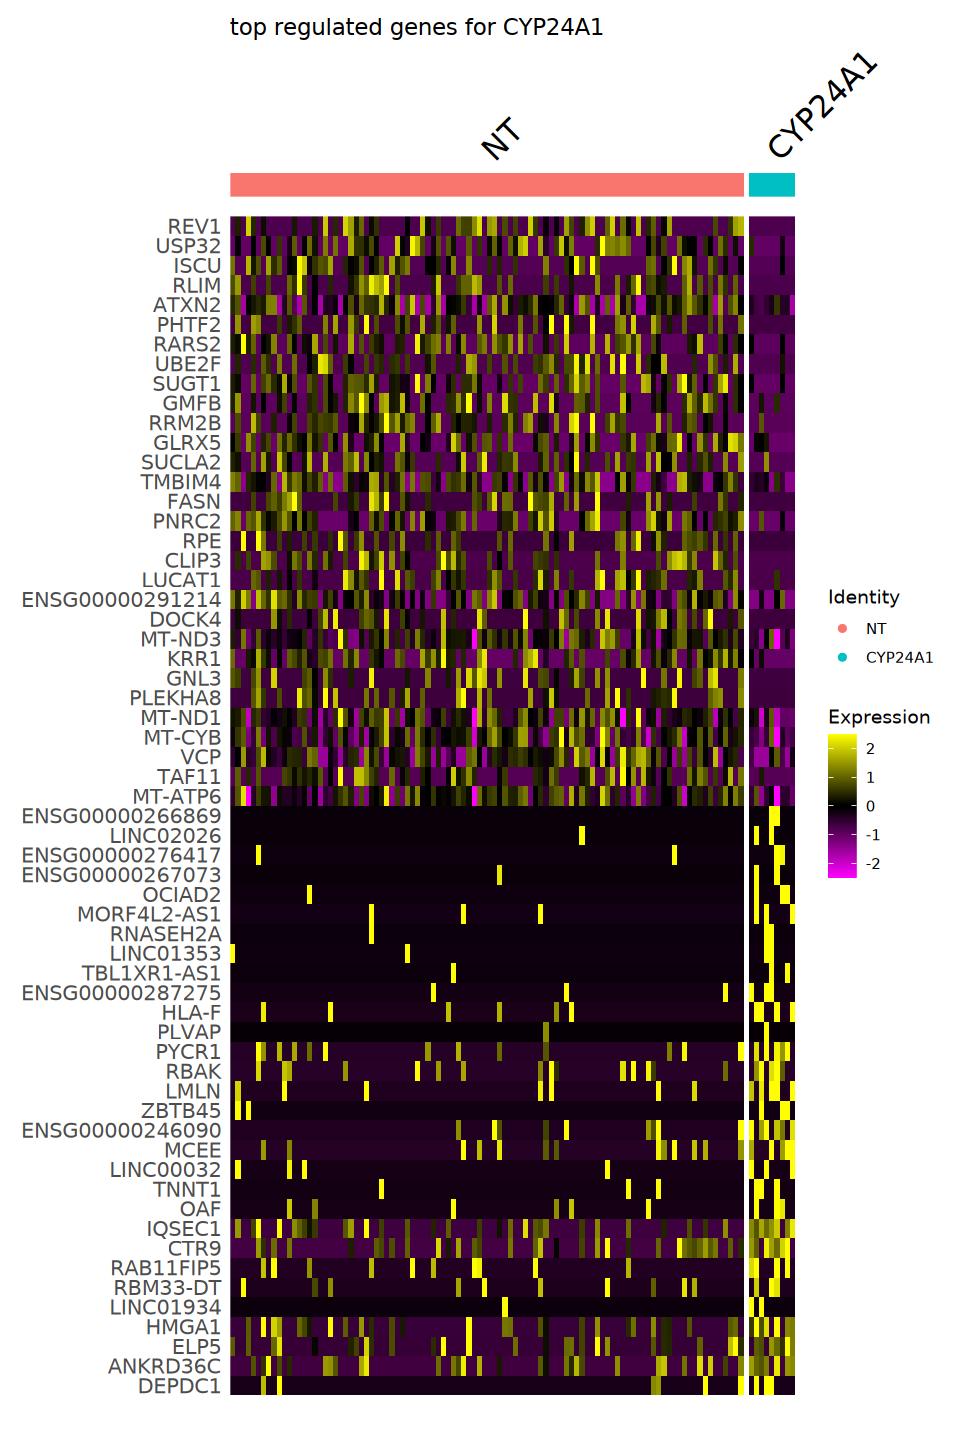

Centering and scaling data matrix



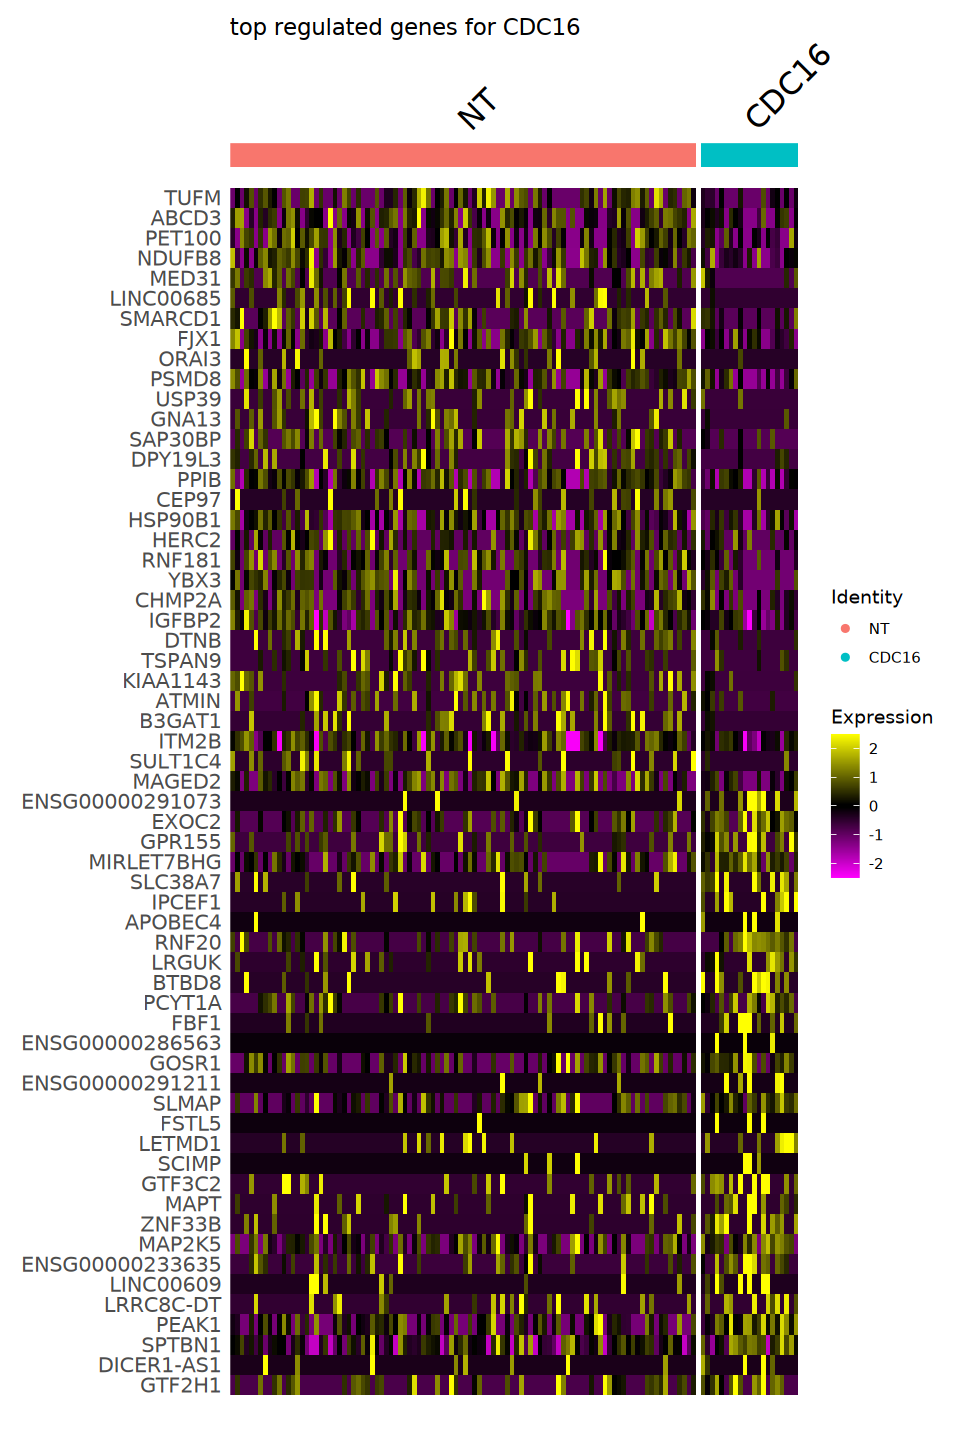

Centering and scaling data matrix



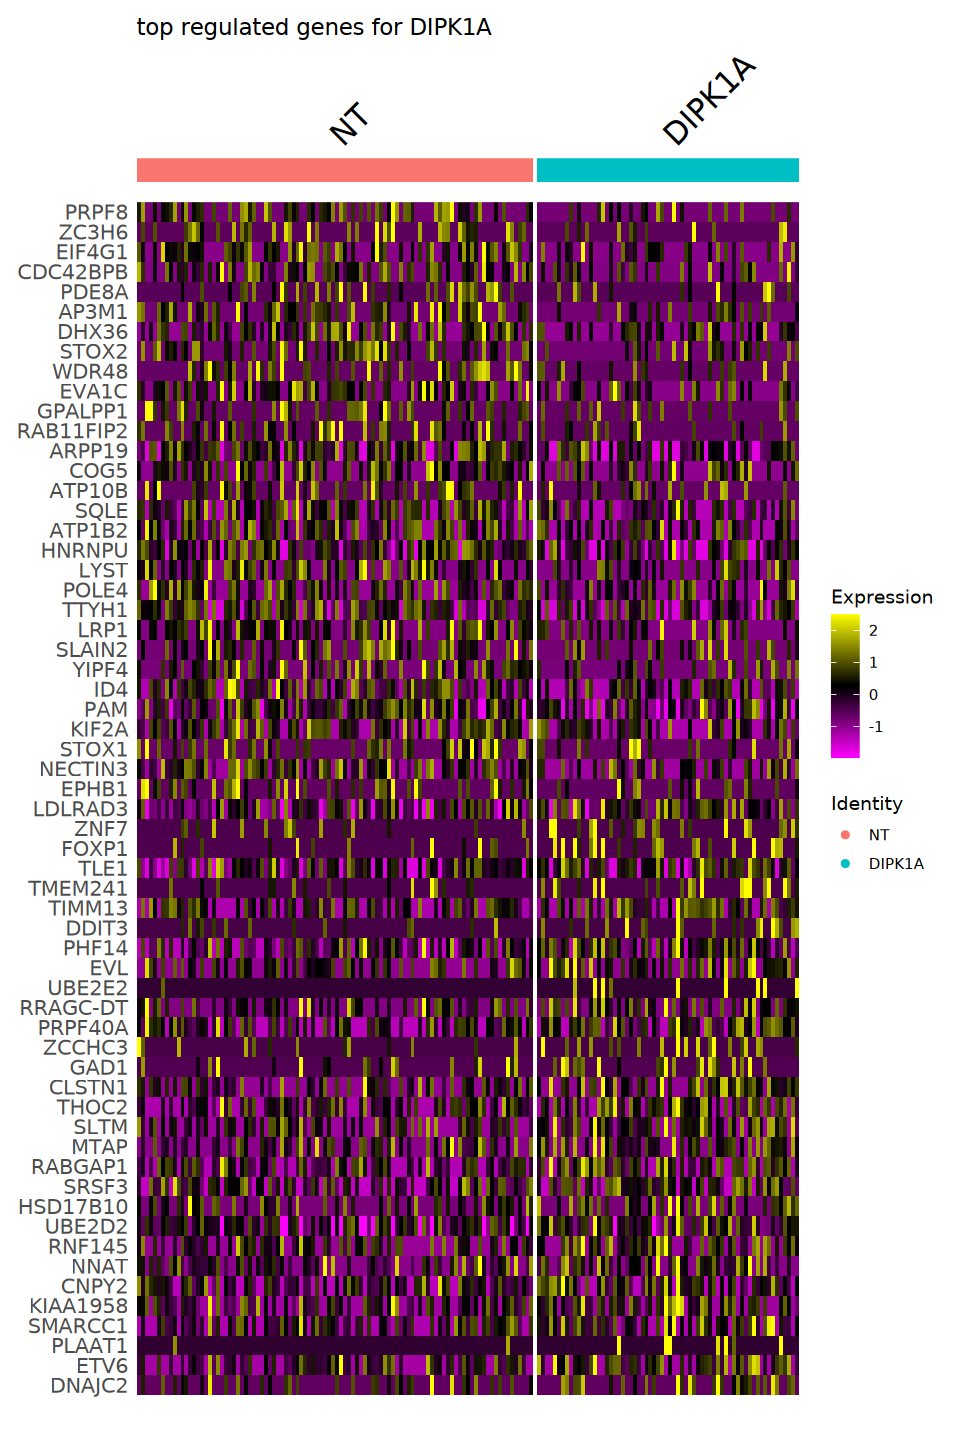

Centering and scaling data matrix



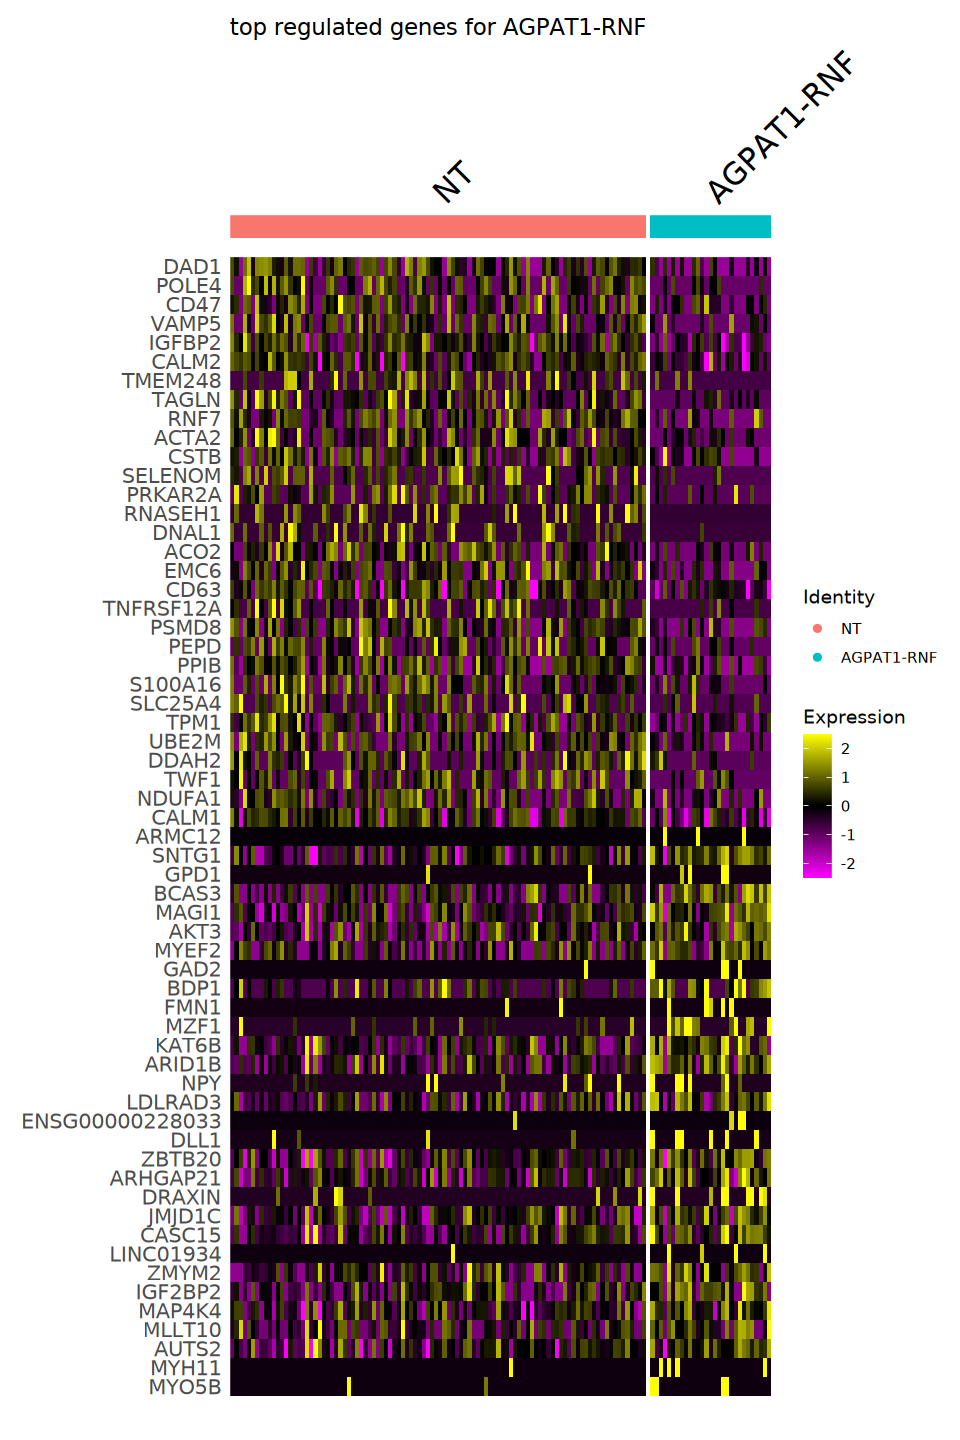

Centering and scaling data matrix



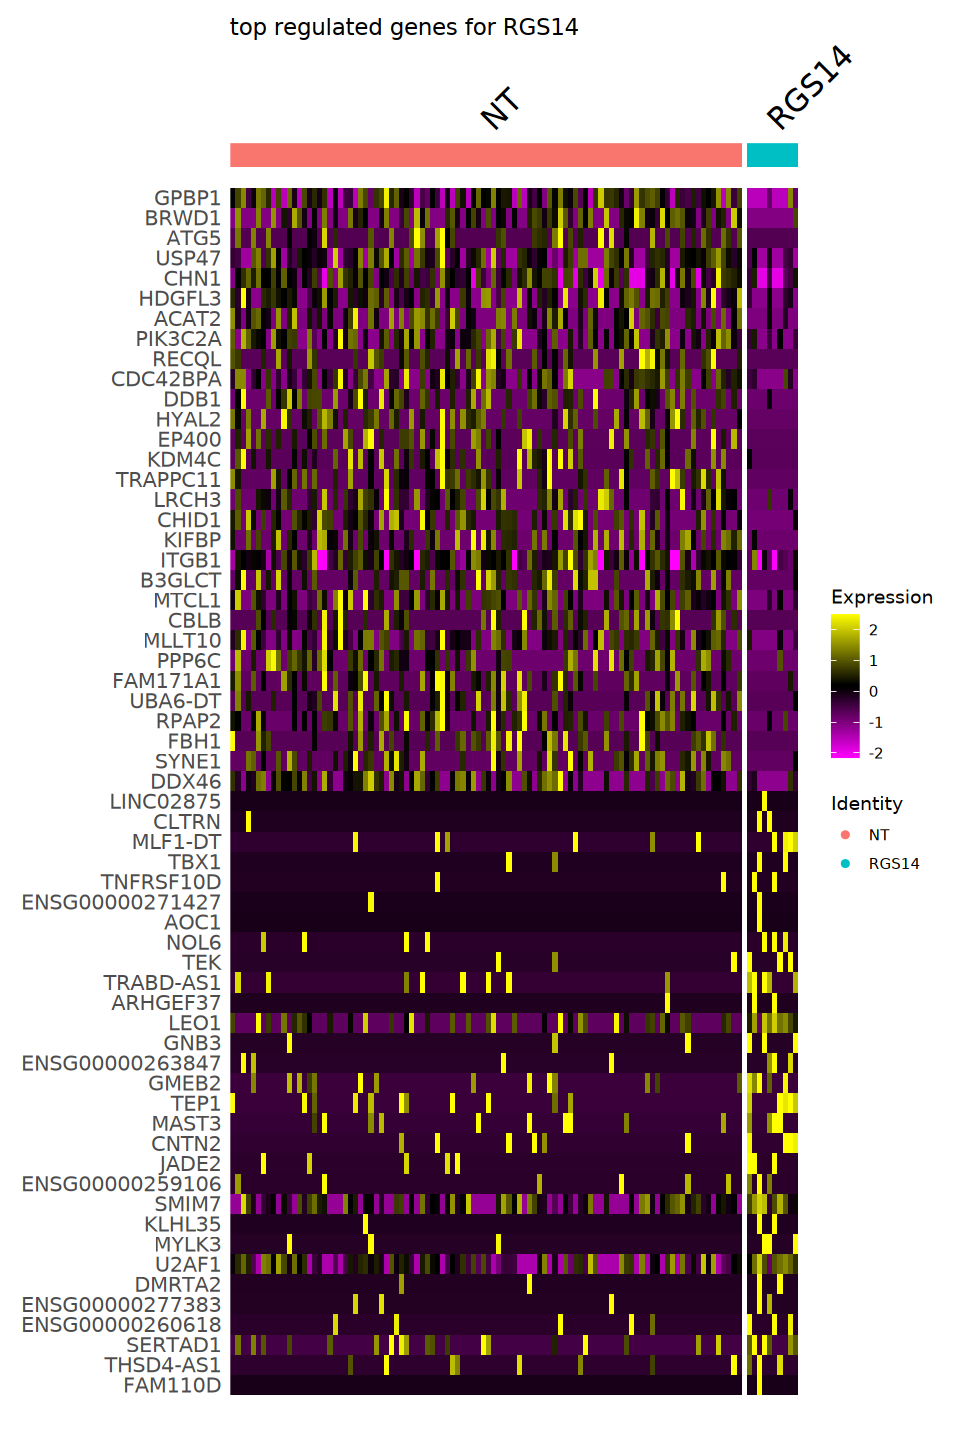

Centering and scaling data matrix



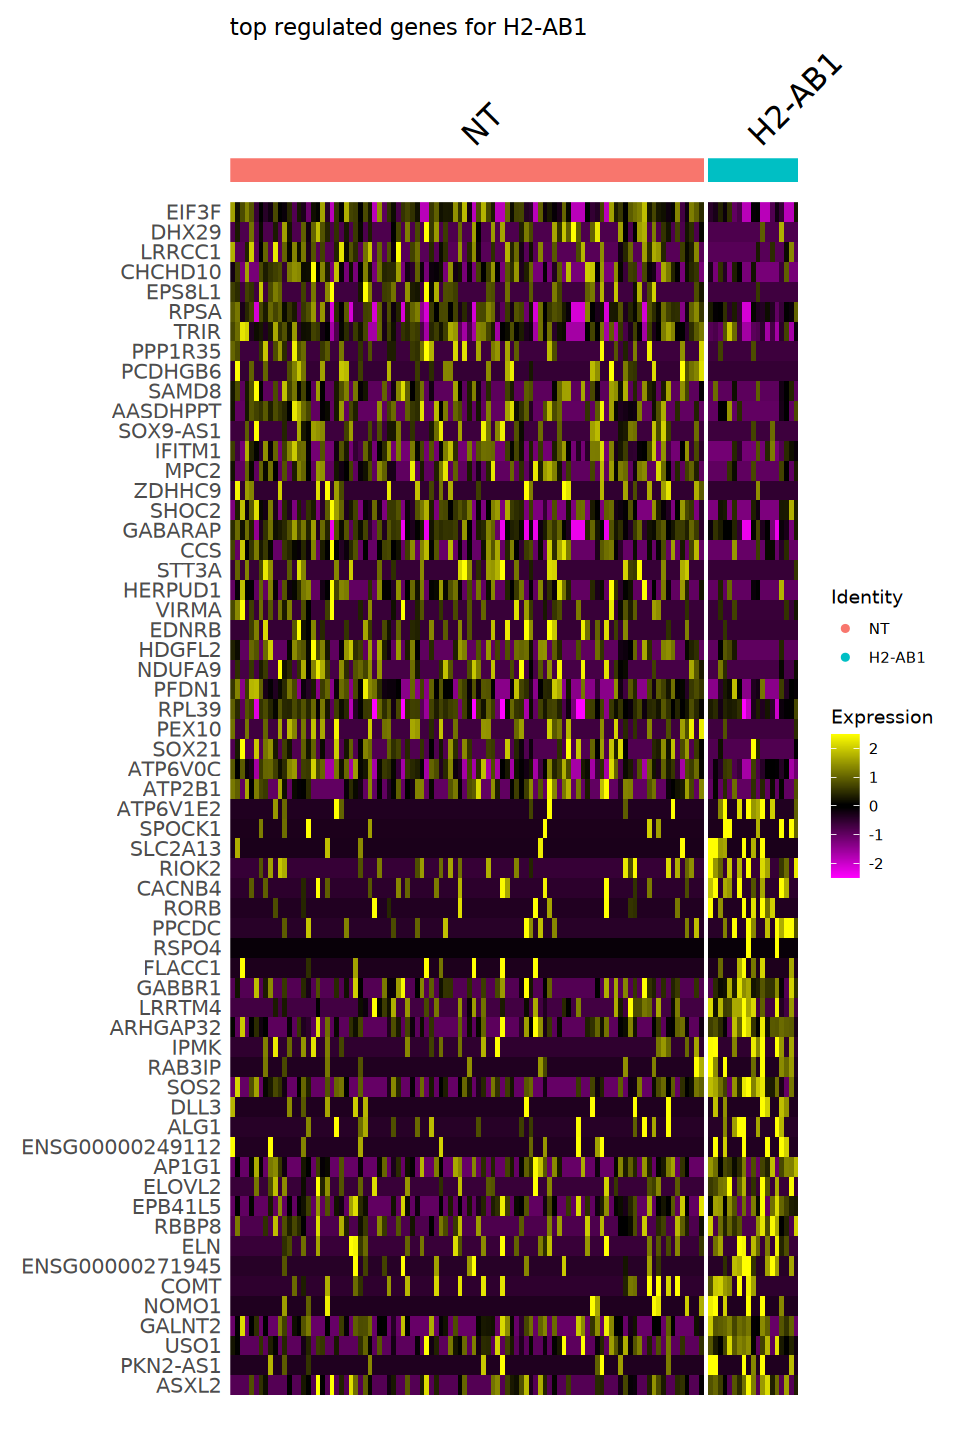

Centering and scaling data matrix



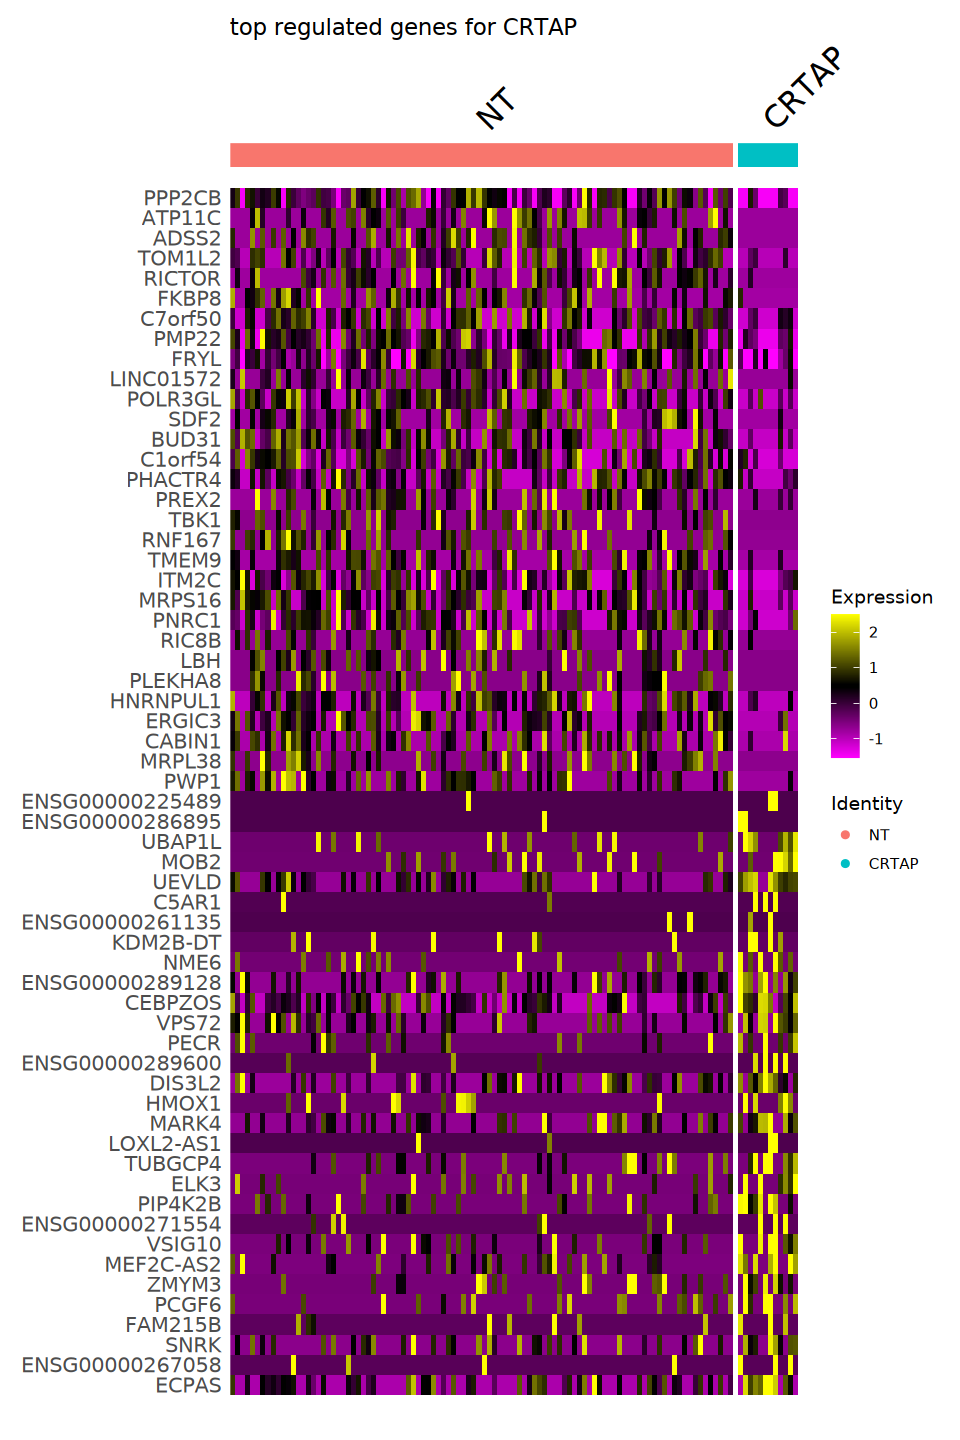

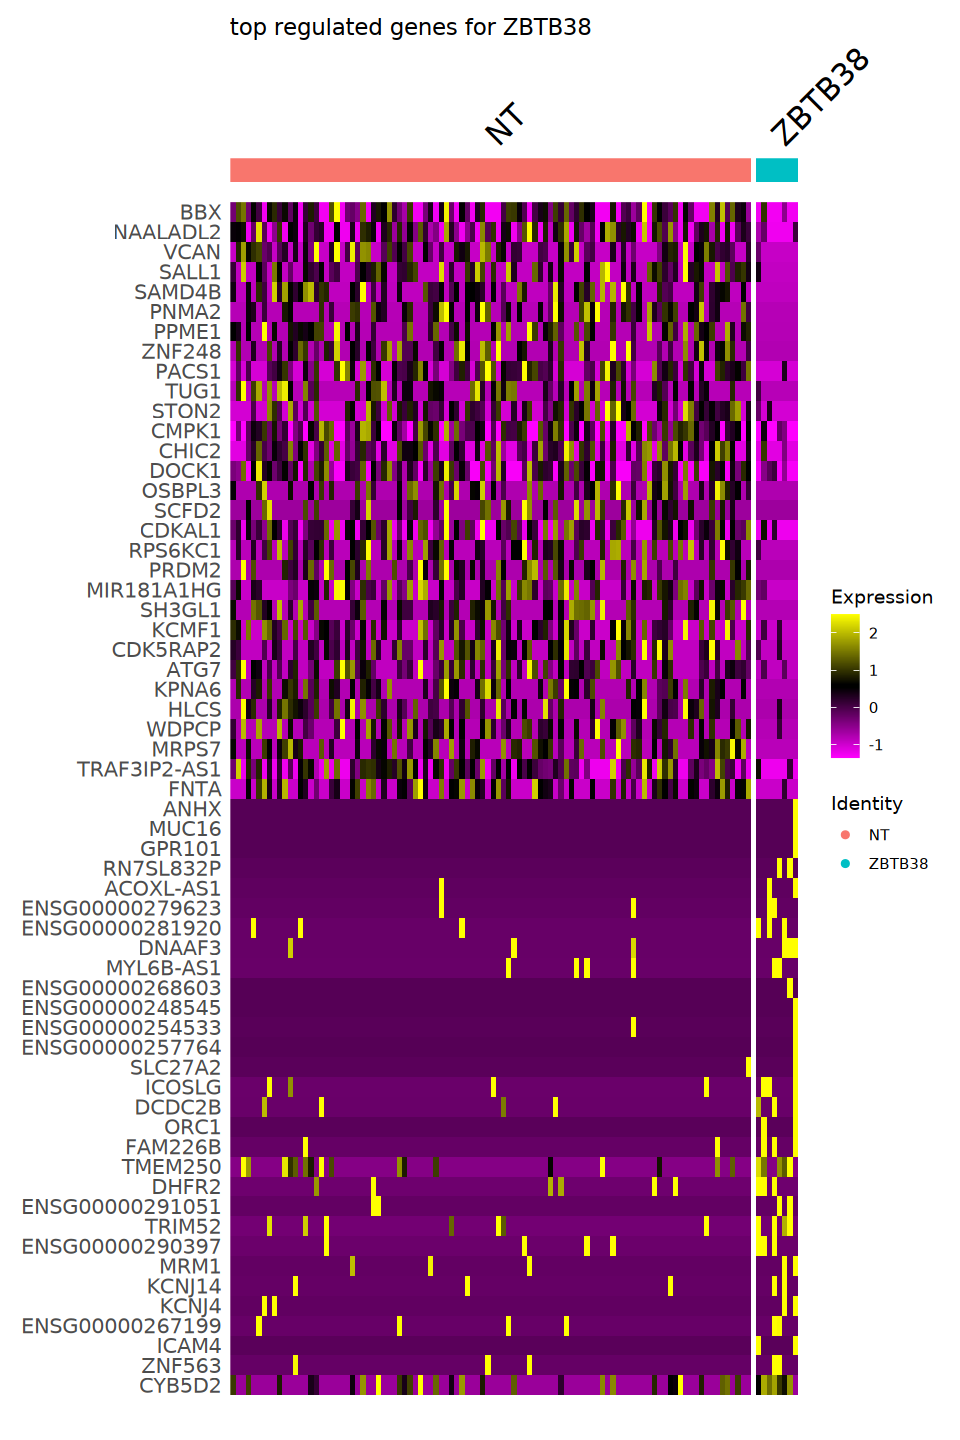

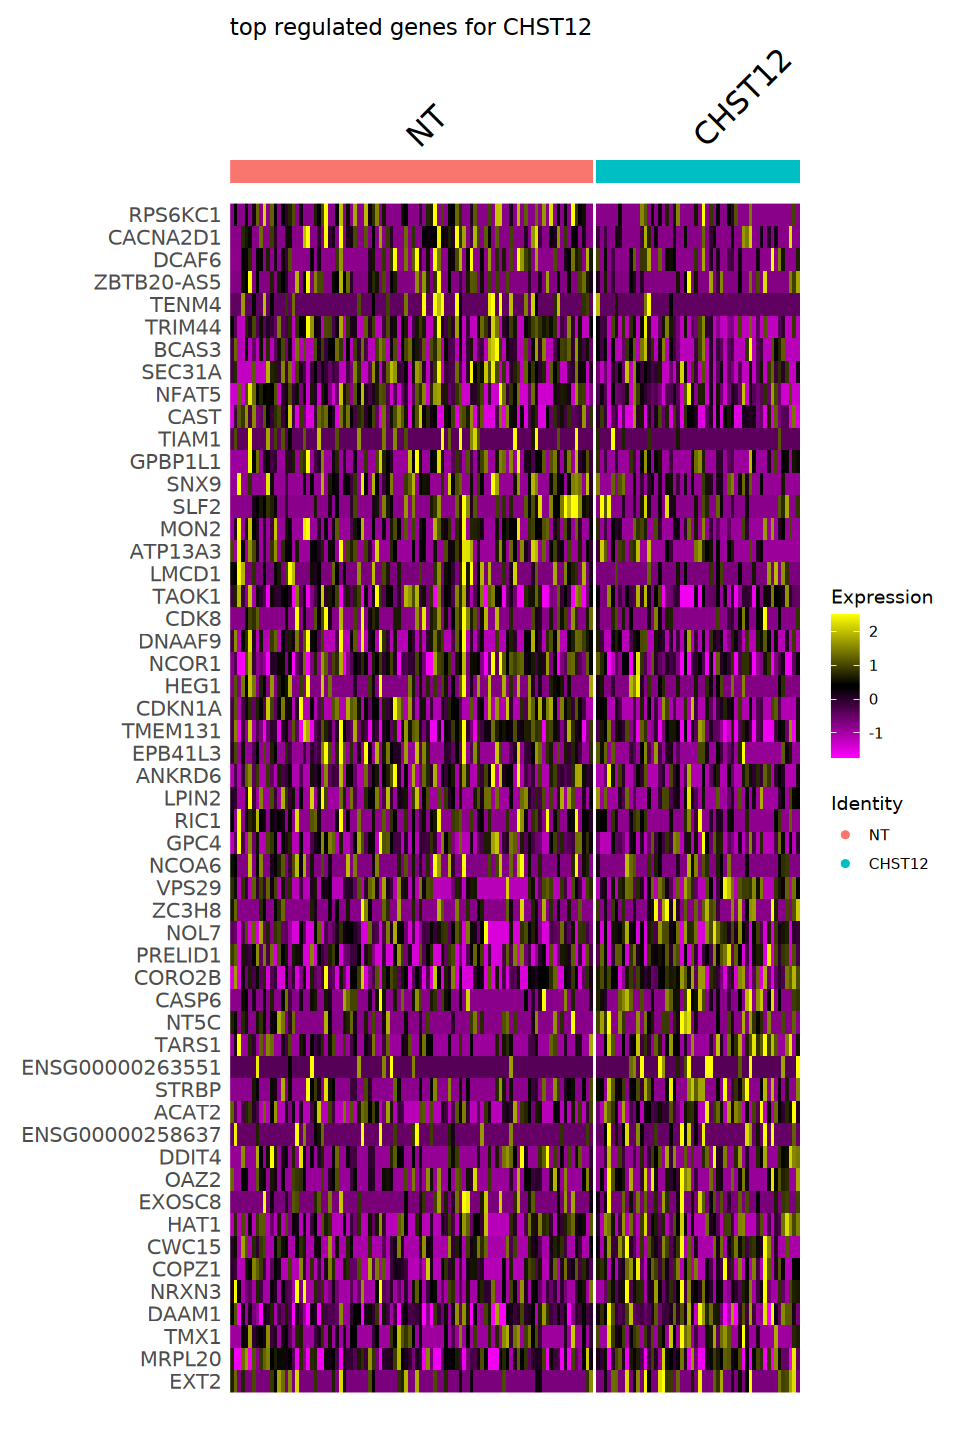

In [9]:
pdim(8,12)

plot_list <- list()

    for(m in c("CYP24A1","CDC16","DIPK1A","AGPAT1-RNF","RGS14",
              "H2-AB1","CRTAP","ZBTB38","CHST12")){
Idents(object = obj) <- "gene"
sub<-subset(obj, subset = mixscape_class %in% c("NT", 
                                                paste0(m," NP"), 
                                                paste0(m," Perturb"))
            )
sub@meta.data$mixscape_class<-factor(sub@meta.data$mixscape_class,
                                    levels = c("NT", 
                                                paste0(m," NP"), 
                                                paste0(m," Perturb")
                                              )
                                     )
        
plot<-MixscapeHeatmap(object = sub, 
                ident.1 = "NT", 
                ident.2 = m, 
                balanced = T, 
                assay = "RNA", 
                max.genes = 30, angle = 45, 
                #test.use = "MAST",
                #group.by = "mixscape_class",
                mixscape.class = "mixscape_class", 
                      prtb.type = "Perturb",
                max.cells.group = 100, 
                size=6.5) + theme(axis.text.y = element_text(size = 12),
                                 axis.title.x = element_text(size = 10))+
                ggtitle(paste0("top regulated genes for ", m))

        print(plot)
    }

# DEG for all guide singlet vs NT using FindMarkers

In [14]:
(guide_genes<-setdiff(unique(obj.list[[1]]@meta.data$gene), "NT"))
length(guide_genes)

[1] "TCF7"          "TBX6"          "H2-T3"         "MYOD1"        
 [5] "CXCR4"         "PLP1"          "AGPAT1-RNF"    "ZNHIT3"       
 [9] "MIR6974"       "LOC105371082"  "MPV17L2"       "ASF1A"        
[13] "PITPNM2"       "CLEC16A"       "DIPK1A"        "HLADRB1-H2EB1"
[17] "PDE1A"         "HOXA1"         "SLC35E2"       "SOX17"        
[21] "RGS14"         "H2"            "ZHX3"          "TENT4A"       
[25] "ZFP217"        "MYB"           "H2-AB1"        "CD71"         
[29] "ZMIZ1"         "ELMO1"         "CYP24A1"       "UCK2"         
[33] "OLIG2"         "GM4632"        "PHLDB1"        "PUS10"        
[37] "JADE2"         "PHGDH"         "CDC16"         "ZBTB38"       
[41] "LINC02732"     "CRTAP"         "SOX10"         "IRF8"         
[45] "8030442B05Rik" "CDKN1B"        "CHST12"        "SCOS1"

[1] 48

In [10]:
for (k in 1:4){
    obj<-obj.list[[k]]
    sample<-names(obj.list)[[k]]
    DefaultAssay(obj)<-"RNA"
    
    for(m in guide_genes){
        Idents(object = obj) <- "gene"

        DEG<-FindMarkers(obj, ident.1 = m, ident.2 = "NT", 
                            logfc.threshold = 0.1)

        write.csv(DEG, file = paste0("/.../Manuscript_output/Singlet_DEG_all/b2_",
                                        sample, "_", m,
                                        "_vsAllNT_DEG.csv"))
    }
}

In [2]:
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: AlmaLinux 8.10 (Cerulean Leopard)

Matrix products: default
BLAS/LAPACK: /home/ting/miniconda3/envs/r4-crispr/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] pheatmap_1.0.12    UpSetR_1.4.0       viridis_0.6.3      viridisLite_0.4.2 
 [5] GGally_2.1.2       hrbrthemes_0.8.0   scCustomize_1.1.3  cowplot_1.1.1     
 [9] magrittr_2.0.3     stringr_1.5.0      reshape2_1.4.4     scales_1.2.1      
[13] SeuratObject_4.1.3 Seurat_